In [1]:
#importing libararies 
import pandas as pd #data processing/analysis
import numpy as np # linear algebra
import seaborn as sns #for making statistical graphics
import matplotlib.pyplot as plt #for data visualisation
%matplotlib inline //
# For Encoding target label and giving range on to our target
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#For splitting data into training and testing 
from sklearn.model_selection import train_test_split
#For Accuracy classification score
from sklearn.metrics import accuracy_score

In [2]:
#Data collection and processing
#Read/load the data
data = pd.read_csv('https://www.openml.org/data/get_csv/1592290/phpgNaXZe')

In [3]:
#getting some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      462 non-null    int64  
 1   V2      462 non-null    float64
 2   V3      462 non-null    float64
 3   V4      462 non-null    float64
 4   V5      462 non-null    int64  
 5   V6      462 non-null    int64  
 6   V7      462 non-null    float64
 7   V8      462 non-null    float64
 8   V9      462 non-null    int64  
 9   Class   462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [4]:
#update the couluns with the folloing names
column = ['sbp','tobacco','ldl','adiposity','famhist','type','obesity','alcohol','age','chd']

In [5]:
data.columns=column

In [6]:
#print first 5 rows of the tabel
data.head()
#also if we want to print the last 5 rows we will type the folowing code "data.tail()"

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [7]:
#checking for any missing values on our dataset
data.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
type         0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [8]:
# Data after modification/here we will be able to study the data more
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,1.584416,53.103896,26.044113,17.044394,42.816017,1.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,1.000000,13.000000,14.700000,0.000000,15.000000,1.000000
25%,124.000000,0.052500,3.282500,19.775000,1.000000,47.000000,22.985000,0.510000,31.000000,1.000000
50%,134.000000,2.000000,4.340000,26.115000,2.000000,53.000000,25.805000,7.510000,45.000000,1.000000
75%,148.000000,5.500000,5.790000,31.227500,2.000000,60.000000,28.497500,23.892500,55.000000,2.000000
max,218.000000,31.200000,15.330000,42.490000,2.000000,78.000000,46.580000,147.190000,64.000000,2.000000


In [9]:
#checking the distribution of chd variable
data['chd'].value_counts()

1    302
2    160
Name: chd, dtype: int64

In [10]:
#Total number of rows and colums in the dataset
data.shape

(462, 10)

In [11]:
data

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,2,64,28.45,0.00,58,1
458,182,4.20,4.41,32.10,2,52,28.61,18.72,52,2
459,108,3.00,1.59,15.23,2,40,20.09,26.64,55,1
460,118,5.40,11.61,30.79,2,64,27.35,23.97,40,1


In [12]:
# feature scaling, making catergorical data precise
encoder = LabelEncoder()
data['famhist']=encoder.fit_transform(data['famhist'])
data['chd']=encoder.fit_transform(data['chd'])

In [13]:
scaler = MinMaxScaler(feature_range= (0,100))
tmp_array = np.array(data['sbp'], dtype="float32").reshape(len(data), -1)
tmp_array=scaler.fit_transform(tmp_array)
data['sbp']= tmp_array. reshape(len(data),)

In [14]:
# 0 repsent healthy heart & 1 repsent defective heart
#splitting the features (all the coulms expet chd) and target(chd coulm)
X = data.drop(columns='chd', axis=1)
Y = data['chd']

In [15]:
print(X)

           sbp  tobacco    ldl  adiposity  famhist  type  obesity  alcohol  \
0    50.427345    12.00   5.73      23.11        0    49    25.30    97.20   
1    36.752136     0.01   4.41      28.61        1    55    28.87     2.06   
2    14.529907     0.08   3.48      32.28        0    52    29.14     3.81   
3    58.974358     7.50   6.41      38.03        0    51    31.99    24.26   
4    28.205124    13.60   3.50      27.78        0    60    25.99    57.34   
..         ...      ...    ...        ...      ...   ...      ...      ...   
457  96.581200     0.40   5.98      31.72        1    64    28.45     0.00   
458  69.230766     4.20   4.41      32.10        1    52    28.61    18.72   
459   5.982903     3.00   1.59      15.23        1    40    20.09    26.64   
460  14.529907     5.40  11.61      30.79        1    64    27.35    23.97   
461  26.495720     0.00   4.82      33.41        0    62    14.70     0.00   

     age  
0     52  
1     63  
2     46  
3     58  
4     49

In [16]:
print (Y)

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64


In [17]:
#splitting our data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(462, 9) (369, 9) (93, 9)


In [19]:
#model 1 Training our dataset using SVM
#Import svm model
from sklearn import svm
svm_clf = svm.SVC(kernel ='linear')

In [20]:
svm_clf.fit(X_train,Y_train)

SVC(kernel='linear')

In [21]:
Y_pred_svm =svm_clf.predict(X_test)

In [22]:
Y_pred_svm

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
cm_svm

array([[55,  6],
       [15, 17]])

In [24]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(Y_test,Y_pred_svm)
print ("Accuracy :",svm_result)

Accuracy : 0.7741935483870968


In [25]:
recall_svm = cm_svm[0][0]/(cm_svm[0][0] + cm_svm[0][1])
precision_svm = cm_svm[0][0]/(cm_svm[0][0]+cm_svm[1][1])
recall_svm,precision_svm

(0.9016393442622951, 0.7638888888888888)

In [26]:
#mondel 2 Training our dataset using KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier (n_neighbors =11,n_jobs = -1,leaf_size = 60,algorithm="brute")

In [27]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1, n_neighbors=11)

In [28]:
Y_pred_knn= knn_clf.predict(X_test)
Y_pred_knn

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_knn

array([[53,  8],
       [23,  9]])

In [30]:
knn_result = accuracy_score(Y_test,Y_pred_knn)
knn_result

0.6666666666666666

In [31]:
recall_knn = cm_knn[0][0]/(cm_knn[0][0] + cm_knn[0][1])
precision_knn = cm_knn[0][0]/(cm_knn[0][0]+cm_knn[1][1])
recall_knn,precision_knn

(0.8688524590163934, 0.8548387096774194)

In [32]:
#model 3 Training our dataset using ANN
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [33]:
ann_clf = MLPClassifier()

#Parameters
parameters = {'solver': ['lbfgs'],
             'alpha':[1e-4],
             'hidden_layer_sizes':(9,14,14,2),   # 9 input, 14-14 neuron in 2 layers,1 output layer
             'random_state': [1],
             'max_iter':[2000]}

In [34]:
# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(ann_clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, Y_train)

# Pick the best combination of parameters
ann_clf = grid_obj.best_estimator_

In [35]:
# Fit the best algorithm to the data 
ann_clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=14, max_iter=2000, random_state=1,
              solver='lbfgs')

In [36]:
Y_pred_ann = ann_clf.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ann = confusion_matrix(Y_test, Y_pred_ann)
cm_ann

array([[48, 13],
       [19, 13]])

In [38]:
ann_result = accuracy_score(Y_test,Y_pred_ann)
ann_result

0.6559139784946236

In [39]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.7868852459016393, 0.7868852459016393)

In [40]:
#COMPARISION OF THE THREE APPROACHES
results ={'Accuracy': [svm_result*100,knn_result*100,ann_result*100],
          'Recall': [recall_svm*100,recall_knn*100,recall_ann*100],
          'Precision': [precision_svm*100,precision_knn*100,precision_ann*100]}
index = ['SVM','KNN','ANN']

In [41]:
results =pd.DataFrame(results,index=index)

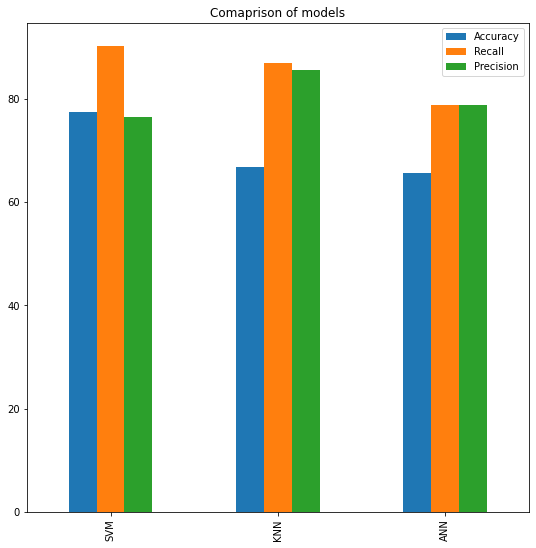

In [42]:

fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')

In [43]:
#Model Logistic Regression
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LinearRegression()

In [51]:
#Building a predictive System

input_data = (14.529907,0.08,3.48,32.28,0,52,29.14,3.81,46)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disesase')

[0.27508929]
The Person has Heart Disesase


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
#print first 5 rows of the tabel
data.head()

,sbp,tobacco,ldl,adiposity,famhist,type,obesity,alcohol,age,chd
0,50.427345,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752136,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529907,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974358,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205124,13.60,3.50,27.78,0,60,25.99,57.34,49,1
